<h1>Notebook Description</h1>

In [1]:
# Improve preprocessing technique to increase accuracy of OCR results

In [2]:
# Key steps to preprocessing an image
# 1) Binarization
# 2) Skew Correction
# 3) Noise Removal
# 4) Thinning and Skeletonization

In [3]:
# 1) Binarization

# DESCRIPTION
# In layman’s terms Binarization means converting a coloured image into an image 
# which consists of only black and white pixels (Black pixel value=0 and White pixel value=255). 
# As a basic rule, this can be done by fixing a threshold (normally threshold=127, as it is 
# exactly half of the pixel range 0–255). If the pixel value is greater than the threshold, it 
# is considered as a white pixel, else considered as a black pixel.

# ISSUE
# Method is dodgy when lighting conditions in image is not uniform

# USING METHOD
# Crucial part of binarization is determining the threshold.

# METHODS FOR DETERMINING THRESHOLD

# 1. LOCAL MAXIMA MINIMA METHOD
# Define a threshold for a defined size of locality in the image (like a 10x10 size part). 
# Using this strategy we’ll have different threshold values for different parts of the image.
# Transitions are not smooth

# 2. OTSU'S BINARIZATION
# Gives a threshold for the whole image considering the various characteristics of the whole image 
# (like lighting conditions, contrast, sharpness etc).

# 3. ADAPTIVE THRESHOLDING
# Gives a threshold for a small part of the image depending on the characteristics of its locality and 
# neighbours i.e there is no single fixed threshold for the whole image but every small part of the 
# image has a different threshold depending upon the locality and also gives smooth transition.

In [4]:
# 2) Skew Correction

# DESCRIPTION
# Image aligned at a certain angle with horizontal

# METHODS FOR SKEW CORRECTION

# 1. Projection profile method [Simplest and mostly used]
# Determines the skew angle then crrects for it

# 2. Hough transformation method

# 3. Topline method

# 4. Scanline method

In [5]:
# 3) Noise Removal

# DESCRIPTION
# Smoothen the image by removing small dots/patches which have high 
# intensity than the rest of the image. Noise removal can be performed 
# for both Coloured and Binary images.

<h1>Library Imports</h1>

In [6]:
# Libraries
import pytesseract                      # Optical Character Recognition
from PIL import Image                   # Image Accessing
import cv2                              # Image Modification
import os                               # Directory handling
import pandas as pd                     # Excel sheets
import xlsxwriter                       # Modifying excel sheets
import matplotlib.pyplot as plt
import numpy as np

# Tesseract Setup
pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Elena.Justo\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'

<h1>Testing Image Classification</h1>

<h2>Preprocess Image</h2>

<h3>Import Image</h3>

In [7]:
# Import image
testImg = cv2.imread(r"sites\rosemeadow\IMG_7694.JPG")

# Turn it into grayscale
testImgGray = cv2.cvtColor(testImg, cv2.COLOR_BGR2GRAY)

<h3>Image Histograms</h3>

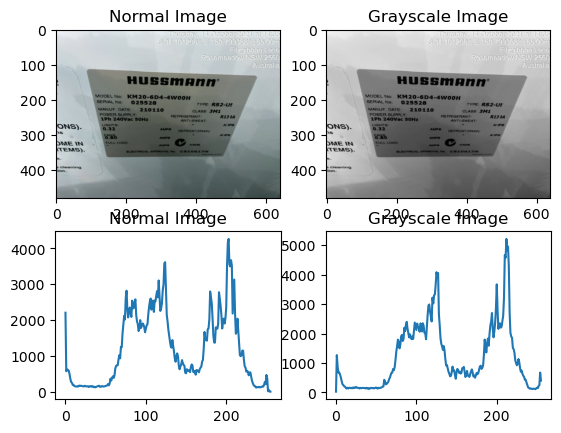

In [8]:
# Make figure
figure, axis = plt.subplots(2, 2)

# Diplay normal image
axis[0, 0].imshow(testImg)
axis[0, 0].set_title("Normal Image")

# Display grayscale image
axis[0, 1].imshow(testImgGray, cmap=plt.cm.gray)
axis[0, 1].set_title("Grayscale Image")

# For Normal Image Histogram
axis[1, 0].plot(cv2.calcHist([testImg], [0], None, [256], [0, 256]))
axis[1, 0].set_title("Normal Image")

# For Grayscale Image Histogram
axis[1, 1].plot(cv2.calcHist([testImgGray], [0], None, [256], [0, 256]))
axis[1, 1].set_title("Grayscale Image")

# Display
plt.show()

<h3>Adjust Image Contrast</h3>

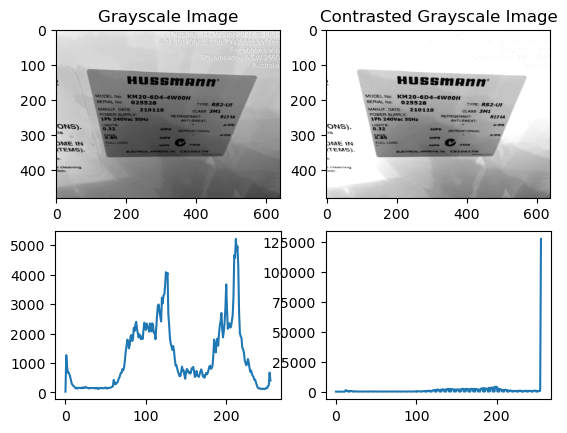

In [9]:
# Apply Contrast
alpha = 1.5  
beta = 10
testImgGrayContrast = cv2.convertScaleAbs(testImgGray, alpha=alpha, beta=beta) 
  
# Make figure
figure, axis = plt.subplots(2, 2)

# Plot the grayscale image
axis[0, 0].imshow(testImgGray, cmap=plt.cm.gray) 
axis[0, 0].set_title("Grayscale Image")

# Plot the contrast image 
axis[0, 1].imshow(testImgGrayContrast, cmap=plt.cm.gray) 
axis[0, 1].set_title("Contrasted Grayscale Image")

# For Normal Image Histogram
axis[1, 0].plot(cv2.calcHist([testImgGray], [0], None, [256], [0, 256]))

# For Grayscale Image Histogram
axis[1, 1].plot(cv2.calcHist([testImgGrayContrast], [0], None, [256], [0, 256]))

# Display
plt.show() 

<h2>Segment Image</h2>

<h3>Image Thresholding</h3>

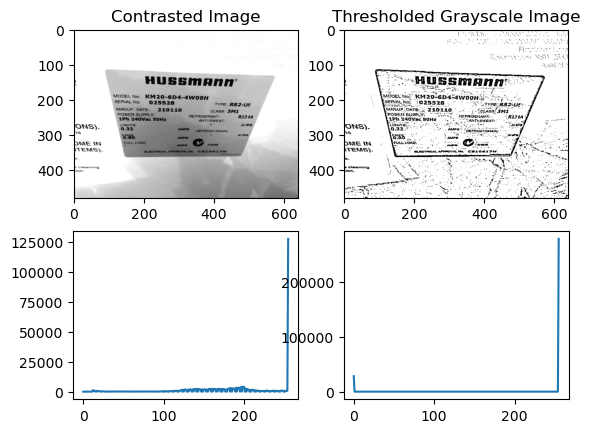

In [10]:
# Segment the image by appling thresholds
testImgThresh = cv2.adaptiveThreshold(testImgGrayContrast,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

# Make figure
figure, axis = plt.subplots(2, 2)

# Plot the Contrasted Grayscale image
axis[0, 0].imshow(testImgGrayContrast, cmap=plt.cm.gray) 
axis[0, 0].set_title("Contrasted Image")

# Plot the Thresholded image 
axis[0, 1].imshow(testImgThresh, cmap=plt.cm.gray) 
axis[0, 1].set_title("Thresholded Grayscale Image")

# For Contrasted Grayscale  Image Histogram
axis[1, 0].plot(cv2.calcHist([testImgGrayContrast], [0], None, [256], [0, 256]))

# For Thresholded Image Histogram
axis[1, 1].plot(cv2.calcHist([testImgThresh], [0], None, [256], [0, 256]))

# Display
plt.show() 

<h2>Postprocess Image</h2>

<h3>Remove Noise</h3>

In [11]:
# Image blurring removes noise
# Uses low pass filters (LPF)
# Averaging, Gaussian Blurring, Bilateral Filtering

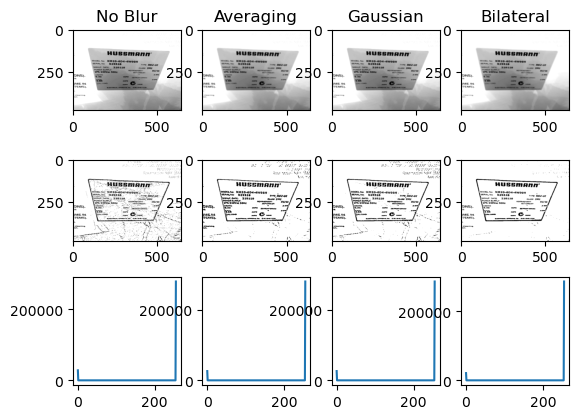

In [12]:
# Averaging Filter
blurAvg = cv2.blur(testImgGrayContrast,(5,5))

# Gaussian FIlter
blurGaussian = cv2.GaussianBlur(testImgGrayContrast,(5,5),0)

# Bilateral Filter
blurBilateral = cv2.bilateralFilter(testImgGrayContrast,9,75,75)

# Make figure
figure, axis = plt.subplots(3, 4)

# Plot the adaptive threshold image with no blur
axis[0, 0].imshow(testImgGrayContrast, cmap=plt.cm.gray) 
axis[0, 0].set_title("No Blur")

# Plot the Blur Avg image
axis[0, 1].imshow(blurAvg, cmap=plt.cm.gray) 
axis[0, 1].set_title("Averaging")

# Plot the Blur Gaussian image 
axis[0, 2].imshow(blurGaussian, cmap=plt.cm.gray) 
axis[0, 2].set_title("Gaussian")

# Plot the Bilateral image 
axis[0, 3].imshow(blurBilateral, cmap=plt.cm.gray) 
axis[0, 3].set_title("Bilateral")

# Non blurred image
axis[1, 0].imshow(testImgThresh, cmap=plt.cm.gray) 

# Plot the Thresholded Blur Avg image
axis[1, 1].imshow(cv2.adaptiveThreshold(blurAvg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2), cmap=plt.cm.gray) 

# Plot the Thresholded Blur Gaussian image 
axis[1, 2].imshow(cv2.adaptiveThreshold(blurGaussian,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2), cmap=plt.cm.gray) 

# Plot the Thresholded Bilateral image 
axis[1, 3].imshow(cv2.adaptiveThreshold(blurBilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2), cmap=plt.cm.gray) 

# Image Histograms
axis[2, 0].plot(cv2.calcHist([testImgThresh], [0], None, [256], [0, 256]))
axis[2, 1].plot(cv2.calcHist([cv2.adaptiveThreshold(blurAvg,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)], [0], None, [256], [0, 256]))
axis[2, 2].plot(cv2.calcHist([cv2.adaptiveThreshold(blurGaussian,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)], [0], None, [256], [0, 256]))
axis[2, 3].plot(cv2.calcHist([cv2.adaptiveThreshold(blurBilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)], [0], None, [256], [0, 256]))

# Display
plt.show() 

<h3>Remove Background</h3>

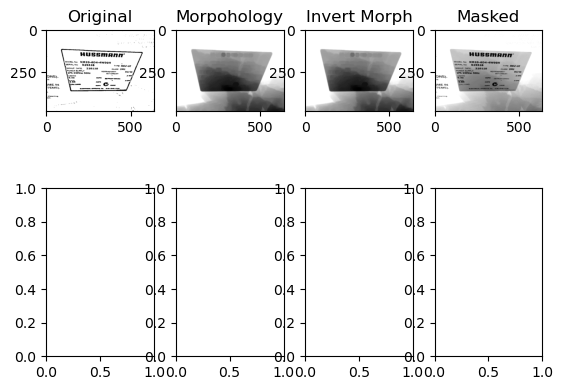

In [13]:
# apply morphology
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))
morph = cv2.morphologyEx(blurGaussian, cv2.MORPH_CLOSE, kernel)

# invert morp image
#mask = 255 - morph
mask = morph

# apply mask to image
result = cv2.bitwise_and(testImgGrayContrast, testImgGrayContrast, mask=mask)

# make figure
figure, axis = plt.subplots(2, 4)

# plot
axis[0, 0].imshow(cv2.adaptiveThreshold(blurBilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2), cmap=plt.cm.gray) 
axis[0, 0].set_title("Original")
axis[0, 1].imshow(morph, cmap=plt.cm.gray) 
axis[0, 1].set_title("Morpohology")
axis[0, 2].imshow(mask, cmap=plt.cm.gray) 
axis[0, 2].set_title("Invert Morph")
axis[0, 3].imshow(result, cmap=plt.cm.gray) 
axis[0, 3].set_title("Masked")

# display
plt.show() 

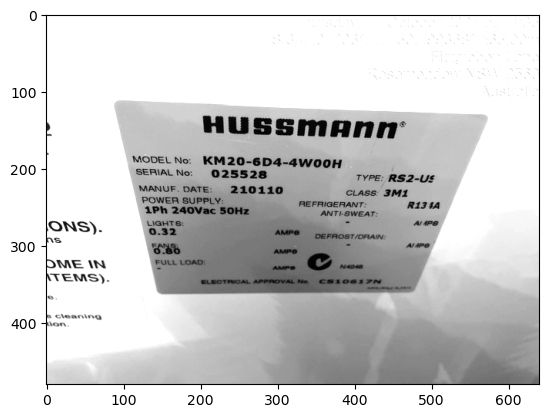

In [14]:
# Final Masked Image
imgplot = plt.imshow(result, cmap=plt.cm.gray)
plt.show()

<h3>Tesseract Metadata</h3>

In [15]:
# Convert

#  Get bounding box estimates
print("Bounidng Box Estimates:")
print("Type: ", type(pytesseract.image_to_boxes(result)))
print(pytesseract.image_to_boxes(result))

# Get verbose data including boxes, confidences, line and page numbers
print("Verbose Data:")
print("Type: ", type(pytesseract.image_to_data(result)))
print(pytesseract.image_to_data(result))

Bounidng Box Estimates:
Type:  <class 'str'>
O 0 198 22 212 0
N 21 198 41 211 0
S 35 194 47 212 0
) 40 197 57 211 0
. 56 194 73 211 0
~ 0 183 20 190 0
O 0 150 13 162 0
M 13 150 33 161 0
E 33 150 49 161 0
I 55 150 62 161 0
N 61 150 78 161 0
\ 0 133 18 143 0
T 12 130 25 143 0
E 20 133 36 143 0
M 35 133 54 143 0
S 48 130 61 143 0
) 54 133 69 143 0
. 68 130 82 143 0
~ 96 0 640 356 0

Verbose Data:
Type:  <class 'str'>
level	page_num	block_num	par_num	line_num	word_num	left	top	width	height	conf	text
1	1	0	0	0	0	0	0	640	480	-1	
2	1	1	0	0	0	0	268	73	29	-1	
3	1	1	1	0	0	0	268	73	29	-1	
4	1	1	1	1	0	0	268	73	18	-1	
5	1	1	1	1	1	0	268	73	18	87.068542	ONS).
4	1	1	1	2	0	0	290	20	7	-1	
5	1	1	1	2	1	0	290	20	7	0.000000	~
2	1	2	0	0	0	0	318	82	32	-1	
3	1	2	1	0	0	0	318	82	32	-1	
4	1	2	1	1	0	0	318	78	12	-1	
5	1	2	1	1	1	0	318	49	12	86.208099	OME
5	1	2	1	1	2	55	319	23	11	68.690895	IN
4	1	2	1	2	0	0	337	82	13	-1	
5	1	2	1	2	1	0	337	82	13	83.173546	\TEMS).
2	1	3	0	0	0	96	124	544	356	-1	
3	1	3	1	0	0	96	124	544	35

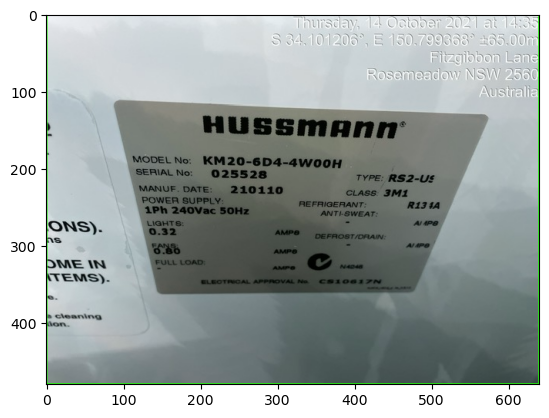

In [16]:
# Get contours
cnts = cv2.findContours(morph, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)  # If erosion

cnts = cnts[0] if len(cnts) == 2 else cnts[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])

# Draw contours onto image
for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    if h > 200 and w > 20:
        roi = testImg[y:y+h, x:x+h]
        plt.imshow(cv2.rectangle(testImg, (x, y), (x+w, y+h), (36, 255, 12), 2))

<h1>Setting up Functions for Image Processing Workflow</h1>

In [17]:
def processImage(imagePath):

    # Get Image
    image = cv2.imread(imagePath)                           # Import image
    imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)     # Turn it into grayscale

    # Apply Contrast
    alpha = 1.5  
    beta = 10
    contrasted = cv2.convertScaleAbs(imageGray, alpha=alpha, beta=beta) 

    # Bilateral Filter
    filtered = cv2.bilateralFilter(contrasted,9,75,75)

    # Segment the image by appling thresholds
    thresholded = cv2.adaptiveThreshold(blurBilateral,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

    # Remove background
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (20,20))  # Make kernel
    morph = cv2.morphologyEx(contrasted, cv2.MORPH_CLOSE, kernel)   # Apply morphology

    # mask = 255 - morph
    mask = morph                                                    # Invert morphology image
    
    result = cv2.bitwise_and(contrasted, contrasted, mask=mask)     # Apply mask to image

    return result

<h1>Testing</h1>

In [21]:
# Folder Setup

# Target folder
dir = r"sites\caringbah"

# Create dataframe file to serve as UI when converted into excel file
user_df = pd.DataFrame(data=[])

# Getting file paths
fileNames = []
for item in os.listdir(dir):
    fileNames.append(item)

filePaths = []
for item in os.listdir(dir):
    filePaths.append(dir + "\\" + item)
    
# Debug
print(fileNames)
print(filePaths)

# Save file names into UI
user_df["File Name"] = fileNames

# EXCEL COLUMNS

# Create new column for images
user_df.insert(1, "Image Preview", None, False)

# Create new column for results
user_df.insert(2, "Raw OCR", None, False)

# Create new column to see processed
user_df.insert(3, "Processed", None, False)

# Create new column to see parsed results
user_df.insert(4, "Results", None, False)

# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter("preprocessTesting.xlsx", engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
user_df.to_excel(writer, sheet_name='Sheet1')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['Sheet1']

# Setting column widths
worksheet.set_column(first_col=0, last_col=0, width=10)      # Index column width
worksheet.set_column(first_col=1, last_col=1, width=15)      # Filename column width
worksheet.set_column(first_col=2, last_col=8, width=50)      # Image columns width

# Embed Raw Images
for image in fileNames:
    worksheet.set_row(row=fileNames.index(image)+1, height=200)                     # Setting row height
    worksheet.embed_image(fileNames.index(image)+1, 2, dir + "\\" + str(image))     # Insert an image.

# Create temp folder to store pre-processing of images
try:
    os.mkdir("temp")
except FileExistsError:
    print("File already exists")

# Clean temp folder
for files in os.listdir("temp"):
    os.remove("temp\\"+files)

# OCR Results
results  = []

['IMG_3669.jpg', 'IMG_3670.jpg', 'IMG_3671.jpg', 'IMG_3672.jpg', 'IMG_3673.jpg', 'IMG_3674.jpg', 'IMG_3675.jpg', 'IMG_3676.jpg', 'IMG_3677.jpg', 'IMG_3678.jpg', 'IMG_3679.jpg', 'IMG_3680.jpg', 'IMG_3681.jpg', 'IMG_3682.jpg', 'IMG_3683.jpg', 'IMG_3684.jpg', 'IMG_3685.jpg', 'IMG_3686.jpg', 'IMG_3687.jpg', 'IMG_3688.jpg', 'IMG_3690.jpg', 'IMG_3691.jpg', 'IMG_3692.jpg', 'IMG_3693.jpg', 'IMG_3694.jpg', 'IMG_3695.jpg', 'IMG_3696.jpg', 'IMG_3697.jpg', 'IMG_3698.jpg', 'IMG_3699.jpg', 'IMG_3700.jpg', 'IMG_3701.jpg', 'IMG_3702.jpg', 'IMG_3703.jpg', 'IMG_3704.jpg', 'IMG_3705.jpg', 'IMG_3706.jpg', 'IMG_3707.jpg', 'IMG_3708.jpg', 'IMG_3709.jpg', 'IMG_3710.jpg', 'IMG_3711.jpg', 'IMG_3712.jpg', 'IMG_3713.jpg', 'IMG_3714.jpg', 'IMG_3715.jpg', 'IMG_3716.jpg', 'IMG_3717.jpg', 'IMG_3718.jpg', 'IMG_3719.jpg', 'IMG_3720.jpg', 'IMG_3721.jpg', 'IMG_3722.jpg', 'IMG_3723.jpg', 'IMG_3724.jpg', 'IMG_3725.jpg', 'IMG_3726.jpg', 'IMG_3727.jpg', 'IMG_3728.jpg', 'IMG_3729.jpg', 'IMG_3730.jpg', 'IMG_3731.jpg', 'IMG_37

In [22]:
# Pre-Process Images
for paths in filePaths:

    image = cv2.imread(paths)

    processed = processImage(dir + "\\" + fileNames[filePaths.index(paths)])

    # Save processed image
    cv2.imwrite("temp\\"+ "processed_" +fileNames[filePaths.index(paths)], processed)

    # Insert the processed image
    worksheet.embed_image(filePaths.index(paths)+1, 4, "temp\\"+ "processed_" +fileNames[filePaths.index(paths)])

     # OCR
    ocr_result = pytesseract.image_to_string("temp\\"+ "processed_" +fileNames[filePaths.index(paths)])
    ocr_result = ocr_result.split("\n")

    if ocr_result == " " or ocr_result == "":
        worksheet.write(filePaths.index(paths)+1, 3, "unreadable")
        continue
    else:
        results.append(ocr_result)
        worksheet.write(filePaths.index(paths)+1, 3, str(ocr_result))
    
    print(fileNames[filePaths.index(paths)])
    #print(ocr_result)
    
    # Filter OCR results for serial numbers
    for word in ocr_result:
        if "SERIAL" in word:
            result = word[word.index("SERIAL"):17]
            print(result)
            worksheet.write(filePaths.index(paths)+1, 5, result)
        elif "02" in word:
            result = word[word.index("02"):17]
            print(result)
            worksheet.write(filePaths.index(paths)+1, 5, result)
        elif "0U" in word:
            result = word[word.index("0U"):17]
            print(result)
            worksheet.write(filePaths.index(paths)+1, 5, result)
        elif "0V" in word:
            result = word[word.index("0V"):17]
            print(result)
            worksheet.write(filePaths.index(paths)+1, 5, result)

IMG_3669.jpg
IMG_3670.jpg
IMG_3671.jpg
IMG_3672.jpg
SERIAL No: 27244 

0

IMG_3673.jpg
IMG_3674.jpg
SERIALNo 266°
0Vac 50H
IMG_3675.jpg
SERIAL No: 018387
0Vac 50Hz A
IMG_3676.jpg
IMG_3677.jpg
IMG_3678.jpg
SERIAL No, 430648
IMG_3679.jpg
IMG_3680.jpg
IMG_3681.jpg
SERIAL No 028292 
0Vac 50Hz w
IMG_3682.jpg
IMG_3683.jpg
SERIALNo: §=01914
0Vac 50Hz A
IMG_3684.jpg
IMG_3685.jpg
SERIAL No. O
0Vac 5
IMG_3686.jpg
IMG_3687.jpg
SERIAL
0243
IMG_3688.jpg
IMG_3690.jpg
IMG_3691.jpg
IMG_3692.jpg
IMG_3693.jpg
IMG_3694.jpg
IMG_3695.jpg
IMG_3696.jpg
IMG_3697.jpg
IMG_3698.jpg
IMG_3699.jpg
IMG_3700.jpg
IMG_3701.jpg
IMG_3702.jpg
IMG_3703.jpg
IMG_3704.jpg
IMG_3705.jpg
SERIALNo) ©=02829
0Vac 50Hz A
IMG_3706.jpg
028297 TY
0Vac 50Hz A
IMG_3707.jpg
IMG_3708.jpg
IMG_3709.jpg
IMG_3710.jpg
IMG_3711.jpg
IMG_3712.jpg
IMG_3713.jpg
IMG_3714.jpg
IMG_3715.jpg
0V 50 Hz nT
IMG_3716.jpg
02-22
IMG_3717.jpg
IMG_3718.jpg
SERIAL NO: 
IMG_3719.jpg
IMG_3720.jpg
IMG_3721.jpg
IMG_3722.jpg
IMG_3723.jpg
IMG_3724.jpg
IMG_3725.jpg
IMG_3

In [23]:
# Close the Pandas Excel writer and output the Excel file.
writer.close()